In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('p.csv')
df = df.fillna(0)
df.sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OID_        10000 non-null  int64  
 1   buildingP   10000 non-null  float64
 2   LAND_USE_T  10000 non-null  object 
 3   pneed       10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


/Users/oo/opt/anaconda3/envs/QGIS/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [3]:
df['test'] = df['buildingP'] - df['pneed']
df.describe()

,OID_,buildingP,pneed,test
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5000.50000,2.017134e+04,1.249645e+04,7.674891e+03
std,2886.89568,6.860666e+04,8.589216e+04,1.061380e+05
min,1.00000,0.000000e+00,0.000000e+00,-1.448138e+06
25%,2500.75000,0.000000e+00,0.000000e+00,0.000000e+00
50%,5000.50000,0.000000e+00,0.000000e+00,0.000000e+00
75%,7500.25000,0.000000e+00,0.000000e+00,0.000000e+00
max,10000.00000,1.433988e+06,1.448138e+06,1.261672e+06


In [4]:
def showMatrix(value):
    v = value.values.reshape(100, 100)
    plt.imshow(v, cmap='magma')

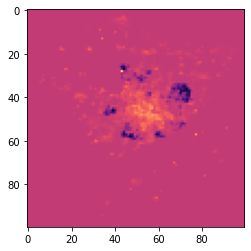

In [5]:
showMatrix(df['test'])

In [6]:
(df['test'] < 0).sum()

303

In [7]:
(df['test'] > 0).sum()

1752

In [8]:
303*1752

530856

In [10]:
twoDArray = df['test'].values.reshape(100, 100)
supplyIndex = []
demandIndex = []
for i in range(99):
    for j in range(99):
        if twoDArray[i][j] > 0:
            supplyIndex.append((i,j))
        elif twoDArray[i][j] < 0:
            demandIndex.append((i,j))
len(supplyIndex)

1751

In [11]:
supplyIndex

[(2, 39),
 (2, 43),
 (2, 44),
 (3, 38),
 (3, 39),
 (3, 40),
 (3, 41),
 (3, 42),
 (3, 43),
 (3, 44),
 (3, 45),
 (4, 38),
 (4, 39),
 (4, 40),
 (4, 41),
 (4, 42),
 (4, 43),
 (4, 44),
 (4, 45),
 (4, 46),
 (5, 38),
 (5, 39),
 (5, 40),
 (5, 41),
 (5, 42),
 (5, 43),
 (5, 44),
 (5, 45),
 (5, 46),
 (5, 47),
 (6, 40),
 (6, 41),
 (6, 42),
 (6, 43),
 (6, 44),
 (6, 45),
 (6, 46),
 (7, 42),
 (7, 43),
 (7, 44),
 (7, 45),
 (7, 46),
 (8, 42),
 (8, 45),
 (8, 46),
 (9, 27),
 (9, 28),
 (9, 31),
 (9, 33),
 (9, 36),
 (9, 43),
 (9, 44),
 (9, 53),
 (9, 54),
 (10, 40),
 (10, 45),
 (10, 52),
 (10, 53),
 (10, 54),
 (10, 55),
 (10, 56),
 (11, 45),
 (11, 51),
 (11, 52),
 (11, 53),
 (11, 54),
 (11, 55),
 (11, 56),
 (11, 57),
 (12, 45),
 (12, 53),
 (12, 54),
 (12, 55),
 (12, 56),
 (12, 57),
 (12, 58),
 (13, 34),
 (13, 46),
 (13, 53),
 (13, 54),
 (13, 55),
 (13, 56),
 (13, 57),
 (13, 58),
 (13, 61),
 (14, 55),
 (14, 57),
 (14, 58),
 (14, 60),
 (14, 61),
 (14, 62),
 (14, 64),
 (14, 72),
 (14, 75),
 (14, 88),
 (14, 91)